Problem Statement:

The Seoul Bike Sharing System has observed fluctuations in the number of bikes rented daily. To optimize bike availability and enhance user satisfaction, it is crucial to understand the factors influencing bike rental patterns. The dataset includes various attributes such as date, hourly rented bike counts, weather conditions (temperature, humidity, wind speed, visibility, dew point temperature, solar radiation, rainfall, snowfall), seasonal information, holidays, and whether it was a functioning day. The goal is to analyze this data to identify key factors affecting bike rental demand and develop predictive models to forecast future bike rental counts accurately.

1) Random Forest

In [57]:
import pandas as pd #Imports the pandas library for data manipulation and analysis.
from sklearn.preprocessing import LabelEncoder # Imports the LabelEncoder class from scikit-learn to convert categorical labels into numerical values.
from sklearn.tree import DecisionTreeClassifier # Imports the DecisionTreeClassifier class from scikit-learn to create decision tree models.
from sklearn.ensemble import RandomForestClassifier # Imports the RandomForestClassifier class from scikit-learn to create random forest models, an ensemble of decision trees.
from sklearn.model_selection import train_test_split # Imports the train_test_split function from scikit-learn to split the dataset into training and testing sets.
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix # Imports various evaluation metrics from scikit-learn to assess the performance of machine learning models.

In [58]:
df=pd.read_csv(r"E:\SNIGDHA\IMI-K Course Outline & Study Material\Term-IV\Data Analytics & Machine Learning\Midterm Assignment\Project 1\SeoulBikeData.csv",encoding='unicode_escape')
# initializing the data in csv format

In [59]:
df.head()
#Displays the first five rows of the dataframe `df`, providing a quick look at the structure and contents of the data.

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [60]:
df.isna().sum()
# Returns the number of missing values (NaNs) in each column of the dataframe `df`.

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [61]:
df.info()
# Provides a concise summary of the dataframe df, including the number of non-null entries, data types of each column, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [62]:
le=LabelEncoder() 
# Creates an instance of the LabelEncoder class to convert categorical labels into numerical values.

In [63]:
df['Seasons_Enc']=le.fit_transform(df['Seasons'])
df['Holiday_Enc']=le.fit_transform(df['Holiday'])
df['Functioning Day_Enc']=le.fit_transform(df['Functioning Day'])
# Encodes the categorical columns into numerical values and assigns the result to a new column '_Enc'.

In [64]:
df.head(2) # Displays the first two rows of the dataframe df, allowing for a quick preview of the initial entries in the data.

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Seasons_Enc,Holiday_Enc,Functioning Day_Enc
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,1
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,1


In [65]:
X=df[['Rented Bike Count','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Seasons_Enc','Holiday_Enc']]
Y=df['Functioning Day_Enc']
# Selects specific columns from the dataframe df to create the feature matrix X for the machine learning model.
# Selects specific columns from the dataframe df to create the feature matrix Y (target variable) for the machine learning model.

In [66]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)
# `train_test_split` splits the dataset into training and testing subsets, with 30% of the data allocated for testing and 70% for training.

In [67]:
rf=RandomForestClassifier()
# rf = RandomForestClassifier() initializes a random forest classifier model, which is an ensemble learning method used for classification tasks.

In [68]:
rf.fit(X_train,Y_train)
# rf.fit(X_train, Y_train) trains the random forest classifier on the training data (X_train and Y_train).

RandomForestClassifier()

In [69]:
feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp
# This code creates a pandas Series of feature importances from the trained random forest model (rf), where each feature's importance is associated with its column name, sorts them in descending order, and then displays the sorted feature importances.

Rented Bike Count            0.908154
Seasons_Enc                  0.026203
Dew point temperature(°C)    0.018885
Temperature(°C)              0.015698
Visibility (10m)             0.008631
Humidity(%)                  0.007954
Wind speed (m/s)             0.006738
Solar Radiation (MJ/m2)      0.006051
Rainfall(mm)                 0.000833
Holiday_Enc                  0.000760
Snowfall (cm)                0.000092
dtype: float64

In [70]:
X=df[['Rented Bike Count','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Seasons_Enc']]
Y=df['Functioning Day_Enc']
# Selects specific columns from the dataframe df to create the feature matrix X for the machine learning model.
# Selects specific columns from the dataframe df to create the feature matrix Y (target variable) for the machine learning model.

In [71]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)
#`X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)` splits the feature matrix `X` and target vector `Y` into training and testing subsets, with 30% of the data allocated for testing and 70% for training.

In [72]:
rf=RandomForestClassifier()
# rf = RandomForestClassifier() creates an instance of a random forest classifier, a machine learning model used for classification tasks that builds multiple decision trees and combines their predictions

In [73]:
rf.fit(X_train,Y_train)
# rf.fit(X_train, Y_train) trains the random forest classifier (rf) using the training data (X_train and Y_train)

RandomForestClassifier()

In [74]:
Y_pred=rf.predict(X_test)

In [75]:
print("Random Forest Classification Performance :")
print("accuracy:",accuracy_score(Y_test,Y_pred),",","precision:",precision_score(Y_test,Y_pred),",","recall:",recall_score(Y_test,Y_pred),",","f1score:",f1_score(Y_test,Y_pred))
# This code prints the performance metrics of the random forest classifier by calculating accuracy, precision, recall, and F1 score based on the true labels (Y_test) and the predicted labels (Y_pred). Make sure Y_pred is defined by calling rf.predict(X_test) before printing the metrics

Random Forest Classification Performance :
accuracy: 1.0 , precision: 1.0 , recall: 1.0 , f1score: 1.0


In [23]:
confusion_matrix(Y_test,Y_pred) # `confusion_matrix(Y_test, Y_pred)` computes the confusion matrix for the true labels (`Y_test`) and the predicted labels (`Y_pred`), which shows the number of true positives, true negatives, false positives, and false negatives, helping to evaluate the performance of the classifier

array([[ 106,    0],
       [   0, 2522]], dtype=int64)

-------------------------------------------------------------------------------------------------------------------------------
2) K -Nearest Neighbour

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [25]:
df=pd.read_csv('C://Users//DELL//Desktop//4th Sem//Machine learning//Project//SeoulBikeData.csv',encoding='unicode_escape')

In [41]:
le=LabelEncoder()
df['Seasons_Enc']=le.fit_transform(df['Seasons'])
df['Holiday_Enc']=le.fit_transform(df['Holiday'])
df['Functioning Day_Enc']=le.fit_transform(df['Functioning Day'])

In [27]:
X=df[['Rented Bike Count','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Seasons_Enc']]
Y=df['Functioning Day_Enc']

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=1,stratify=Y) 
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y) splits the dataset into training and testing subsets with 30% of the data reserved for testing, ensuring reproducibility with random_state=1 and preserving the class distribution in both subsets by using stratify=Y.

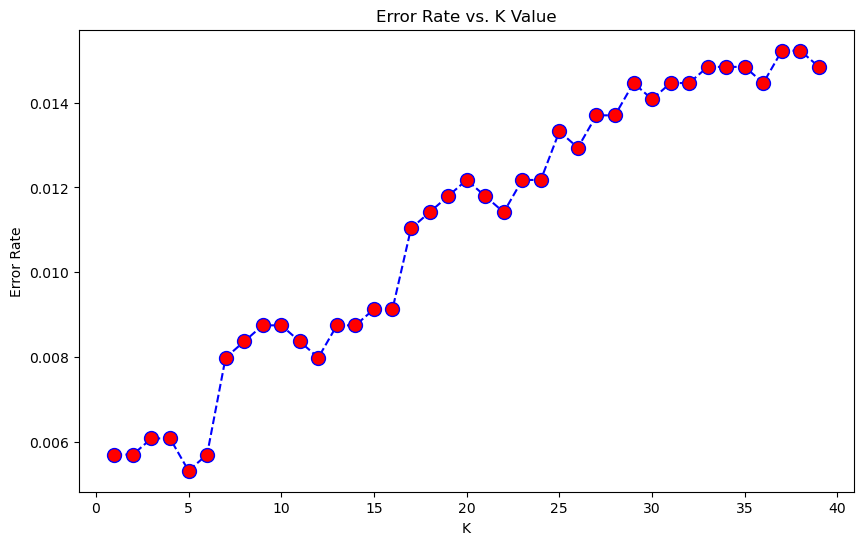

Minimum error:- 0.0053272450532724225 at K = 5


In [29]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(Y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

#this code evaluates the error rate of a k-nearest neighbors classifier for different values of k, ranging from 1 to 39, and plots the error rate against k:

#Loop through values of k: For each value from 1 to 39, a KNeighborsClassifier is instantiated with n_neighbors=i, trained on the training data, and used to make predictions on the test data.

#Calculate error rate: The error rate is computed as 1 - accuracy_score(Y_test, pred_i) and appended to the error_rate list.

#Plot the results: A plot of the error rate versus k is generated, with markers indicating the value of k.

#Find and print the minimum error rate: The minimum error rate and its corresponding k value are printed.

In [30]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, Y_train)
#knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean') initializes a k-nearest neighbors classifier with 5 neighbors and Euclidean distance as the distance metric.
#knn.fit(X_train, Y_train) trains the classifier using the training data (X_train and Y_train).

KNeighborsClassifier(metric='euclidean')

In [31]:
Y_pred1 = knn.predict(X_test) # This code uses the trained k-nearest neighbors classifier (knn) to make predictions on the test data (X_test) and stores the predicted labels in Y_pred1

In [32]:
confusion_matrix(Y_test, Y_pred1) # confusion_matrix(Y_test, Y_pred1) calculates the confusion matrix for the true labels (Y_test) and the predicted labels (Y_pred1), showing the counts of true positives, true negatives, false positives, and false negatives to evaluate the classifier’s performance.

array([[  80,    8],
       [   6, 2534]], dtype=int64)

In [37]:
print("KNN Performance :")
print('Accuracy_Score:' ,accuracy_score(Y_test, Y_pred1),",", "Precision_Score:",",",precision_score(Y_test, Y_pred1),",","Recall_Score:",recall_score(Y_test, Y_pred1),",","F1_Score:",f1_score(Y_test, Y_pred1))
# The provided code prints the performance metrics for the k-nearest neighbors classifier, including accuracy, precision, recall, and F1 score

KNN Performance :
Accuracy_Score: 0.9946727549467276 , Precision_Score: , 0.996852871754524 , Recall_Score: 0.9976377952755906 , F1_Score: 0.9972451790633609


------------------------------------------------------------------------------------------------------------------------------
3. XGBoost

In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [39]:
df=pd.read_csv('C://Users//DELL//Desktop//4th Sem//Machine learning//Project//SeoulBikeData.csv',encoding='unicode_escape')

In [2]:
le=LabelEncoder()
df['Seasons_Enc']=le.fit_transform(df['Seasons'])
df['Holiday_Enc']=le.fit_transform(df['Holiday'])
df['Functioning Day_Enc']=le.fit_transform(df['Functioning Day'])
# Each categorical feature is transformed into a numeric format suitable for machine learning models. If the categorical variables have different values or are to be used separately, make sure to instantiate LabelEncoder separately for each column.

NameError: name 'LabelEncoder' is not defined

In [43]:
X=df[['Rented Bike Count','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Seasons_Enc']]
Y=df['Functioning Day_Enc']

In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [54]:
import xgboost as xgb
model = xgb.XGBClassifier()

In [55]:
model.fit(X_train,Y_train) # model.fit(X_train, Y_train) trains the machine learning model (denoted as model) using the training data (X_train and Y_train).

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
Y_pred2=model.predict(X_test) #Y_pred2 = model.predict(X_test) uses the trained model to make predictions on the test data (X_test) and stores the predicted labels in Y_pred2.

In [57]:
confusion_matrix(Y_test, Y_pred2)
#confusion_matrix(Y_test, Y_pred2) computes the confusion matrix for the true labels (Y_test) and the predicted labels (Y_pred2), which provides a summary of the prediction results in terms of true positives, true negatives, false positives, and false negatives.

array([[  90,    2],
       [   1, 2535]], dtype=int64)

In [58]:
print("XGBoostPerformance :")
print('Accuracy_Score:' ,accuracy_score(Y_test, Y_pred2),",", "Precision_Score:",",",precision_score(Y_test, Y_pred2),",","Recall_Score:",recall_score(Y_test, Y_pred2),",","F1_Score:",f1_score(Y_test, Y_pred2))

# This code prints the performance metrics for the XGBoost classifier (or any other model) on the test data, including accuracy, precision, recall, and F1 score

XGBoostPerformance :
Accuracy_Score: 0.9988584474885844 , Precision_Score: , 0.9992116673236106 , Recall_Score: 0.9996056782334385 , F1_Score: 0.9994086339444116


-----------------------------------------------------------------------------------------------------------------------------
Comparison of the performance of the 3 Models: Random Forest, KNN & XGBoost

Random Forest (RF) shows perfect metrics across all performance measures, making it the best-performing model in this specific dataset. However, typically, such perfect scores can be a sign of overfitting, so it's crucial to cross-validate these results on different datasets or use regularization techniques if needed.

1st preference - Random Forest

2nd preference - XGBoost

3rd preference - KNN

------------------------------------------------------------------------------------------------------------------------------
Taking new Record to predict :

In [108]:
X_train.head(2)
#to check the columns of the training model, and to create the new_data 

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Seasons_Enc
1713,222,1.6,78,2.0,260,-1.8,3
1230,36,-3.1,54,1.4,1037,-11.1,3


In [113]:
new_data1=pd.read_csv(r"C:\Users\snigd\Downloads\new_data1.csv",encoding='unicode_escape')
# to read the new data 

In [114]:
new_data1
# print the new data

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Seasons_Enc
0,254,-5.2,37,2.2,2000,-17.6,3


In [115]:
rf.predict(new_data1)
# The predicted value of the new data

array([1])

In [118]:
Y_pred
#The predicted value of the previous data in model

array([1, 0, 1, ..., 1, 1, 1])

From this we can see that the new data value and the value given by the model are matching so the model is working good and giving right results. 